# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
# setting the coupons data
data = pd.read_csv('data/coupons.csv')

In [3]:
# showing the first five columns
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# listing all available columns, respective totals and 
# data types for each of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
# checking for missing data
missing_data = data.isnull().sum()
missing_data_proportion = missing_data / len(data)

print("Missing data counts:\n", missing_data)
print("Missing data proportions:\n", missing_data_proportion)

Missing data counts:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Missing data proportions:
 destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# we can see that the "car" column in particular is 
# missing majority of it's data, hence it will be dropped
data_cleaned = data.drop(columns=['car'])

In [7]:
# apart from the "car" column there are other columns with missing data
# the rows with missing data will be dropped
columns_with_minor_missing_data = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data_cleaned = data_cleaned.dropna(subset=columns_with_minor_missing_data)

print("Remaining missing data counts:\n", data_cleaned.isnull().sum())

Remaining missing data counts:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?

In [8]:
# obtaining the counts of "yes" (Y=1) and "no" (Y=0)
counts = data['Y'].value_counts()

# calculating the proportion based on the counts
yes_count = counts.get(1, 0)
no_count = counts.get(0, 0)
total_count = yes_count + no_count
proportion_accepted_coupon = yes_count / total_count
proportion_did_not_accept_coupon = no_count / total_count

print(f"The proportion of coupons that were accepted: {math.ceil(proportion_accepted_coupon*100)}%")
print(f"The proportion of coupons that were not accepted: {math.ceil(proportion_did_not_accept_coupon*100)}%")

The proportion of coupons that were accepted: 57%
The proportion of coupons that were not accepted: 44%


5. Use a bar plot to visualize the `coupon` column.

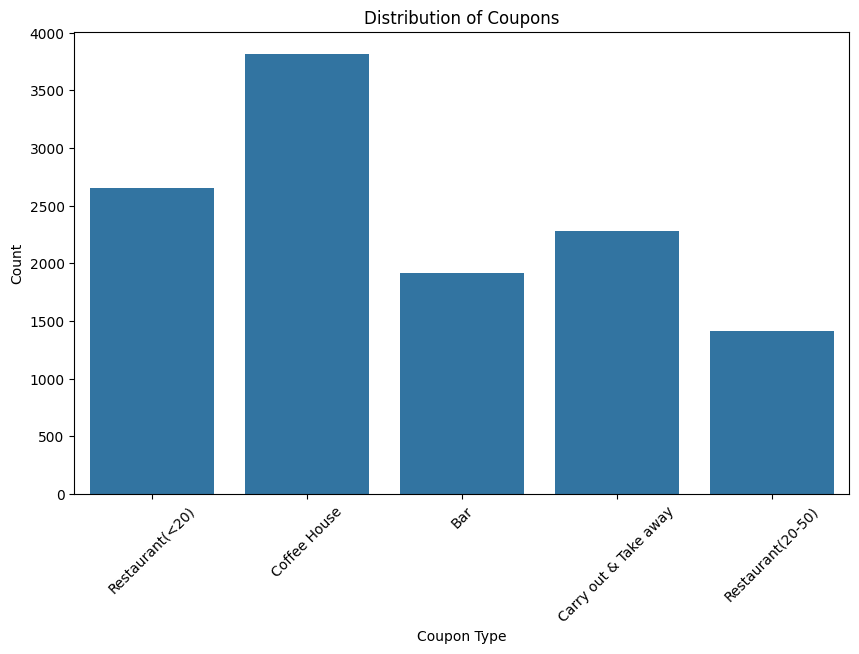

In [9]:
# plotting a chart with the distribution of coupon types
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='coupon')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- we can see that the majority of coupons belong to the "Coffee House" type, whereas
  the more expensive restaurant type is the least

6. Use a histogram to visualize the temperature column.


The first ten unique temperatures recorded: [55 80 30]



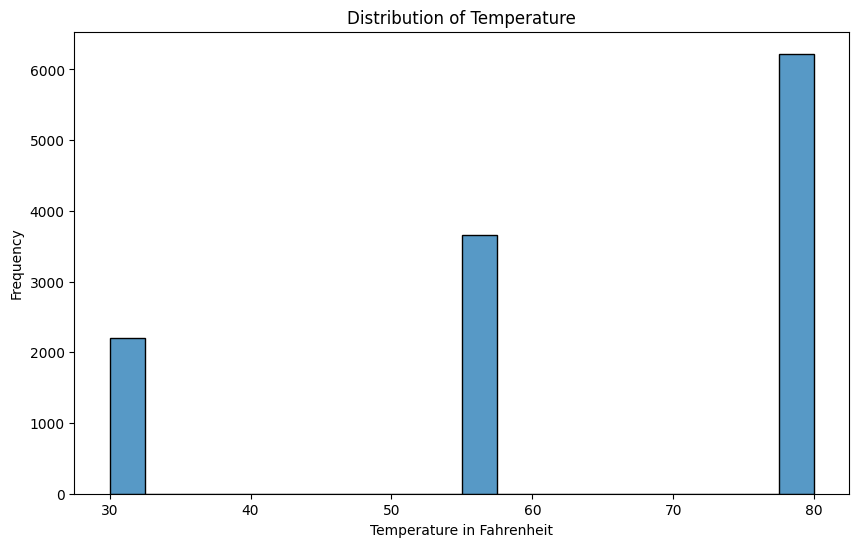

In [10]:
# displaying a sample set of the unique temperatures recorded
print(f"\nThe first ten unique temperatures recorded: {data["temperature"].unique()[:10]}\n")

# plotting a chart with the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='temperature', bins=20, kde=False)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Frequency')
plt.show()

- we can see that for majority of the coupons received, the temperature called for either
  a sweater/jacket or was warm enough as to not require any additional layers.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
# filtering data for bar coupons
bar_coupons = data_cleaned[data_cleaned['coupon'] == 'Bar']

display(bar_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [12]:
# obtaining the counts of "yes" (Y=1) and "no" (Y=0)
counts = bar_coupons['Y'].value_counts()

# calculating the proportion based on the counts
yes_count = counts.get(1, 0)
no_count = counts.get(0, 0)
total_count = yes_count + no_count
proportion_accepted_coupon = yes_count / total_count
proportion_did_not_accept_coupon = no_count / total_count

print(f"The proportion of coupons that were accepted: {math.floor(proportion_accepted_coupon*100)}%")
print(f"The proportion of coupons that were not accepted: {math.floor(proportion_did_not_accept_coupon*100)}%")

The proportion of coupons that were accepted: 41%
The proportion of coupons that were not accepted: 58%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# mapping the categorical values to integers
map_bar = {'never': '0', 'less1': '1', '1~3': '2', '4~8': '4', 'gt8': '8'}
bar_coupons.loc[:, 'Bar'] = bar_coupons['Bar'].map(map_bar)

In [14]:
# setting the type as integer
bar_coupons.loc[:, 'Bar'] = bar_coupons['Bar'].fillna(0).astype(int)

In [15]:
# computing the acceptance rates for both the groups
accepted_few_three = len(bar_coupons[(bar_coupons['Bar'] <= 3) & (bar_coupons['Y'] == 1)])
accepted_few_three_total = len(bar_coupons[bar_coupons['Bar'] <= 3])
accepted_few = (accepted_few_three/accepted_few_three_total)*100

accepted_many_three = len(bar_coupons[(bar_coupons['Bar'] > 3) & (bar_coupons['Y'] == 1)])
accepted_many_three_total = len(bar_coupons[bar_coupons['Bar'] > 3])
accepted_many = (accepted_many_three/accepted_many_three_total)*100

print("Acceptance rate for those who went to a bar 3 or fewer times a month:", math.floor(accepted_few*100)/100, "%")
print("Acceptance rate for those who went to a bar more than 3 times a month:", math.floor(accepted_many*100)/100, "%")

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.26 %
Acceptance rate for those who went to a bar more than 3 times a month: 76.16 %


In [16]:
# performing a statistical significance test to 
# confirm empirical difference between the two groups
counts = [accepted_few_three, accepted_many_three]
totals = [accepted_few_three_total, accepted_many_three_total]
stat, p_value = proportions_ztest(counts, totals)

stat, p_value

(-10.410996447689154, 2.208972597533727e-25)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
# casting categorical values to integers
bar_coupons.loc[:, 'age'] = bar_coupons['age'].replace({'50plus': 50, 'below21': 20}).astype(int)
print(bar_coupons['age'].unique())
bar_coupons['age'].value_counts()

[21 46 26 31 41 50 36 20]


age
21    397
26    368
31    324
50    273
36    196
41    171
46    103
20     81
Name: count, dtype: int64

In [18]:
# drivers who go to a bar more than once a month and are over 25
accepted_more_once_over25 = len(bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25) & (bar_coupons['Y'] == 1)])
total_more_once_over25 = len(bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)])

# all others (those who either go to a bar once or less a month, or are 25 or younger)
accepted_others = len(bar_coupons[(bar_coupons['Bar'] <= 1) | (bar_coupons['age'] <= 25) & (bar_coupons['Y'] == 1)])
total_others = len(bar_coupons[(bar_coupons['Bar'] <= 1) | (bar_coupons['age'] <= 25)])

# computing acceptance rates for both groups
accepted_rate_more_once_over25 = (accepted_more_once_over25 / total_more_once_over25) * 100
accepted_rate_others = (accepted_others / total_others) * 100

print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:", math.floor(accepted_rate_more_once_over25*100)/100, "%")
print("Acceptance rate for all others:", math.floor(accepted_rate_others*100)/100, "%")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.98 %
Acceptance rate for all others: 96.35 %


In [19]:
# performing a statistical significance test to 
# confirm empirical difference between the two groups
counts = [accepted_more_once_over25, accepted_others]
totals = [total_more_once_over25, total_others]
stat, p_value = proportions_ztest(counts, totals)
stat, p_value

(-16.72310234151775, 8.896501221229474e-63)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [20]:
accepted_bar_passenger_occupation = len(bar_coupons[(bar_coupons['Bar'] > 1) & 
                                                (bar_coupons['passanger'] != 'Kid(s)') & 
                                                (bar_coupons['occupation'] != 'Farming, Fishing, and Forestry') &
                                                (bar_coupons['Y'] == 1)])
accepted_bar_passenger_occupation_total = len(bar_coupons[(bar_coupons['Bar'] > 1) & 
                                                (bar_coupons['passanger'] != 'Kid(s)') & 
                                                (bar_coupons['occupation'] != 'Farming, Fishing, and Forestry')])

accepted_others_passenger_occupation = len(bar_coupons[~((bar_coupons['Bar'] > 1) &
                                                     (bar_coupons['passanger'] != 'Kid(s)') &
                                                     (bar_coupons['occupation'] != 'Farming, Fishing, and Forestry')) &
                                                     (bar_coupons['Y'] == 1)])
accepted_others_passenger_occupation_total = len(bar_coupons[~((bar_coupons['Bar'] > 1) &
                                                     (bar_coupons['passanger'] != 'Kid(s)') &
                                                     (bar_coupons['occupation'] != 'Farming, Fishing, and Forestry'))])

accepted_rate_group = (accepted_bar_passenger_occupation / (accepted_bar_passenger_occupation_total)) * 100
accepted_rate_others = (accepted_others_passenger_occupation) / (accepted_others_passenger_occupation_total) * 100

print("Acceptance rate for specific group:", math.floor(accepted_rate_group*100)/100, "%")
print("Acceptance rate for all others:", math.floor(accepted_rate_others*100)/100, "%")

Acceptance rate for specific group: 70.94 %
Acceptance rate for all others: 29.79 %


In [21]:
# performing a statistical significance test to 
# confirm empirical difference between the two groups
counts = [accepted_bar_passenger_occupation, accepted_others_passenger_occupation]
totals = [accepted_bar_passenger_occupation_total, accepted_others_passenger_occupation_total]
stat, p_value = proportions_ztest(counts, totals)
stat, p_value

(16.36701725883189, 3.289449656152296e-60)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [22]:
condition_set_1 = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')
condition_set_2 = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)
condition_set_3 = (bar_coupons['RestaurantLessThan20'] == '4~8') & (bar_coupons['income'] == 'Less than $50,000')

accepted_conditions = len(bar_coupons[(condition_set_1 | condition_set_2 | condition_set_3) & bar_coupons['Y'] == 1])
conditions_total = len(bar_coupons[(condition_set_1 | condition_set_2 | condition_set_3)])

accepted_conditions_others = len(bar_coupons[(~(condition_set_1 | condition_set_2 | condition_set_3)) & bar_coupons['Y'] == 1])
conditions_others_total = len(bar_coupons[~(condition_set_1 | condition_set_2 | condition_set_3)])

accepted_rate_all_sets = ((accepted_conditions) / (conditions_total)) * 100
accepted_rate_others = ((accepted_conditions_others) / (conditions_others_total)) * 100

print("Acceptance rate for condition all sets:", math.floor(accepted_rate_all_sets*100)/100, "%")
print("Acceptance rate for condition others:", math.floor(accepted_rate_others*100)/100, "%")

Acceptance rate for condition all sets: 71.05 %
Acceptance rate for condition others: 29.47 %


In [23]:
# performing a statistical significance test to 
# confirm empirical difference between the two groups
counts = [accepted_conditions_others, accepted_rate_all_sets]
totals = [conditions_others_total, accepted_rate_others]
stat, p_value = proportions_ztest(counts, totals)
stat, p_value

(-24.0084517774142, 2.2693733353021437e-127)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis: Drivers who frequent bars more often, particularly those who are younger, not widowed, and with certain passenger and occupational profiles, are more likely to accept bar coupons. Additionally, those who also frequent inexpensive restaurants and have lower incomes are inclined to accept bar coupons.

- After analyzing the bar coupons data up to question 6, we observe that the acceptance rate of the coupon increases across different groups as we move through the filtering conditions.
- This trend indicates that our selection criteria are effectively improving, allowing us to better identify the characteristics of drivers who are more likely to accept the coupon.
- The stepwise increase in acceptance percentages suggests that we are narrowing down to target groups that exhibit higher probabilities of coupon acceptance.
- The significance test statistic and p-value output in each of the sections: 4, 5, and 6, confirm that there is a statistical empirical difference between the acceptance rate for the condition group and the acceptance rate for the total of that feature.
    - The p-value is significantly lower than the common significance level of 0.05 which shows that there is a statistically significant difference between the acceptance rates between the aforementioned groups.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [24]:
# we will now explore the coffee house coupons
ch_coupons = data_cleaned[data_cleaned['coupon'] == 'Coffee House']

# obtaining the counts of "yes" (Y=1) and "no" (Y=0)
counts = ch_coupons['Y'].value_counts()

# calculating the proportion based on the counts
yes_count = counts.get(1, 0)
no_count = counts.get(0, 0)
total_count = yes_count + no_count
proportion_accepted_coupon = yes_count / total_count
proportion_did_not_accept_coupon = no_count / total_count

print(f"The proportion of coupons that were accepted: {math.floor(proportion_accepted_coupon*100)}%")
print(f"The proportion of coupons that were not accepted: {math.floor(proportion_did_not_accept_coupon*100)}%")

display(ch_coupons.head())

The proportion of coupons that were accepted: 49%
The proportion of coupons that were not accepted: 50%


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


- we can see that the target variable in the coffee house coupons is evenly balanced

### Chi-Square Evaluation and Probability Distribution

In [25]:
# converting categorical variables to numerical
X = pd.get_dummies(ch_coupons.drop('Y', axis=1), drop_first=True)
y = ch_coupons['Y']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

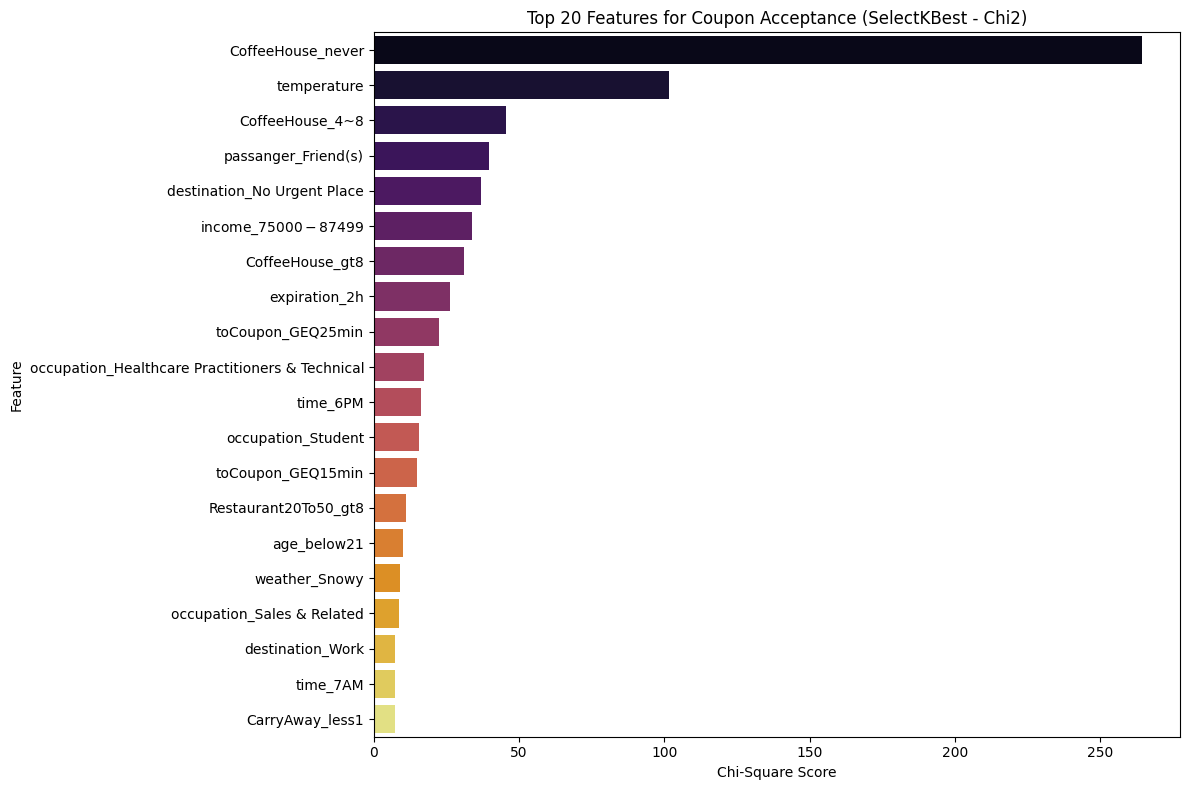

In [26]:
# chi-square is used here because it evaluates the independence between each feature and the target variable by 
# comparing observed and expected frequencies. A high Chi-Square score indicates that the feature has 
# a significant association with the target. It works well for selecting important categorical features when 
# the data is discrete, as it measures how much each feature contributes to explaining the variability in 
# the target variable.

skb = SelectKBest(score_func=chi2, k=10)
skb.fit(X_train, y_train)
feature_scores_skb = pd.DataFrame({'Feature': X.columns, 'Score': skb.scores_}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_scores_skb.head(20), x='Score', y='Feature', hue='Feature', palette='inferno', legend=False)
plt.title('Top 20 Features for Coupon Acceptance (SelectKBest - Chi2)')
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The top features for coupon acceptance from the Chi-Square test indicate:

- **CoffeeHouse_never** is the most influential factor, suggesting people who never visit coffee houses have a distinct pattern in accepting or rejecting coupons.
- **Temperature** significantly impacts acceptance, likely due to changes in behavior based on weather.
- **Frequency of visits to coffee houses**, such as `CoffeeHouse_4~8` and `CoffeeHouse_gt8`, also has a strong influence, indicating that moderate to high frequency visitors respond differently to coupons.
- **Passenger context** (e.g., having friends) and **destination type** (e.g., "No Urgent Place") are significant, showing that social situations and flexible schedules lead to higher acceptance.
- **Income level** (`75000 - 87499`), **coupon expiration**, and **travel time** (`toCoupon_GEQ25min`) also play a role, highlighting personal circumstances and urgency as important factors.
- **Occupation types**, such as `Healthcare Practitioners & Technical` and `Student`, also influence acceptance rates, indicating the impact of job type and work flexibility.
- **Time of day** (`6PM`, `7AM`) and **weather conditions** (`Snowy`) are additional influencing factors, suggesting that situational timing and environmental factors affect coupon acceptance.
- **Carry-out frequency**, such as `CarryAway_less1`, also impacts acceptance, highlighting different behavioral patterns in food-related activities.
- **Top Combined Condition Group** (`Healthcare Practitioners & Technical` and `CoffeeHouse_4~8`) has the highest acceptance rate, indicating these combined characteristics are the most effective for targeting.
- **Next Best Combined Condition Group** (`Healthcare Practitioners & Technical`, `CoffeeHouse_4~8`, and `Passanger_Friend(s)`) also shows a high acceptance rate, making it another valuable target group.

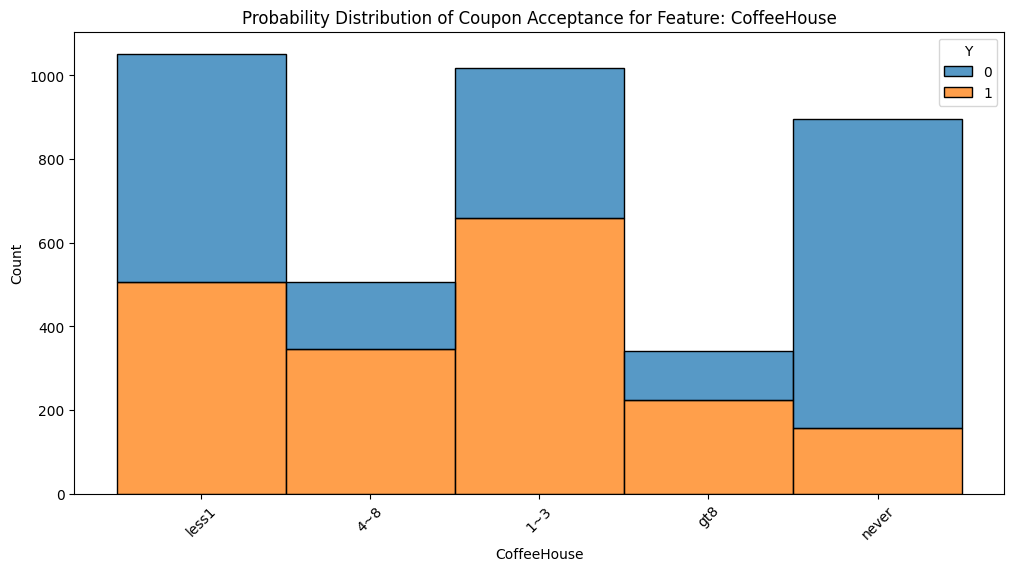

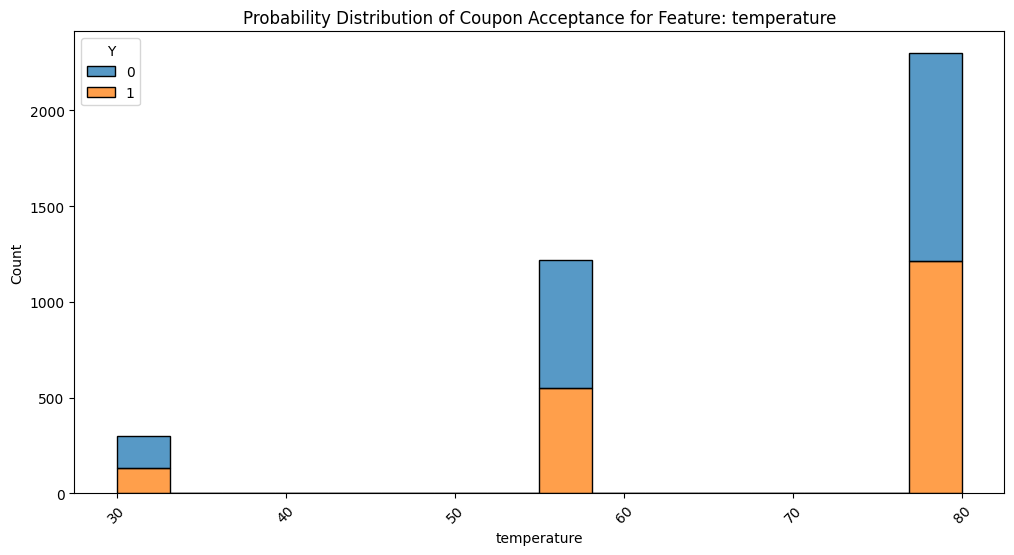

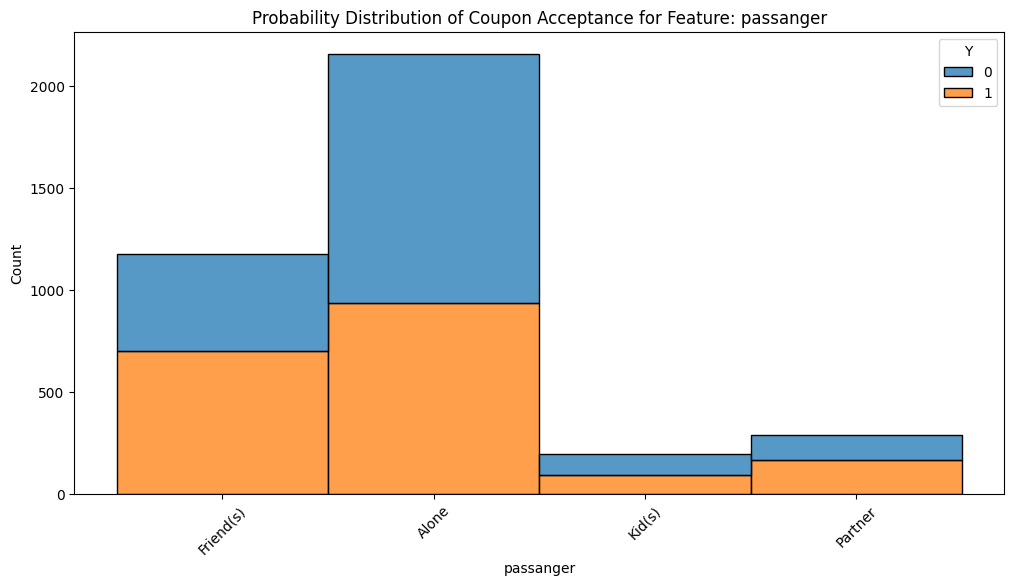

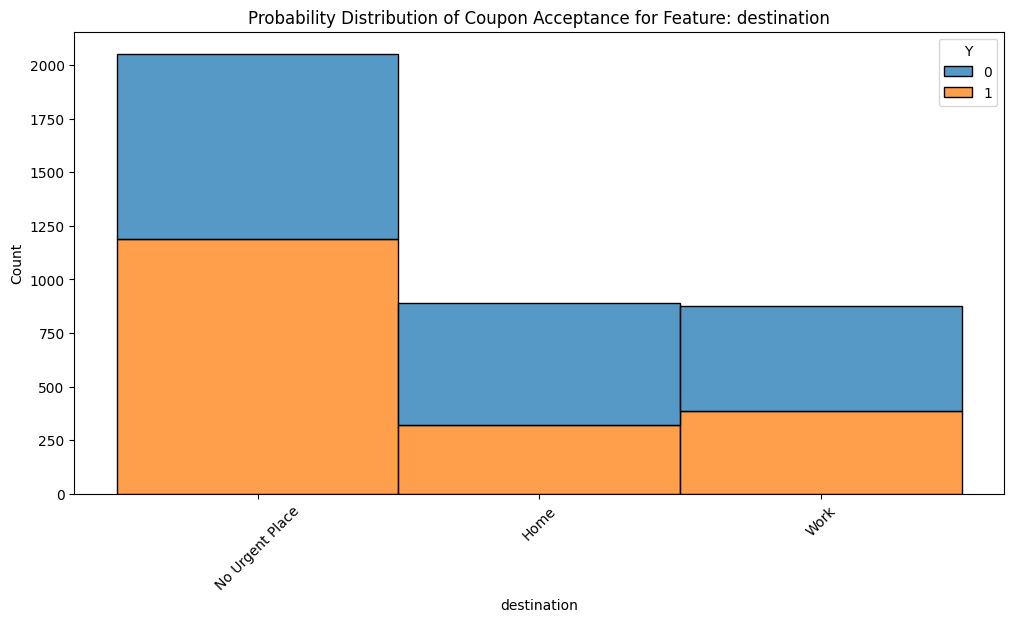

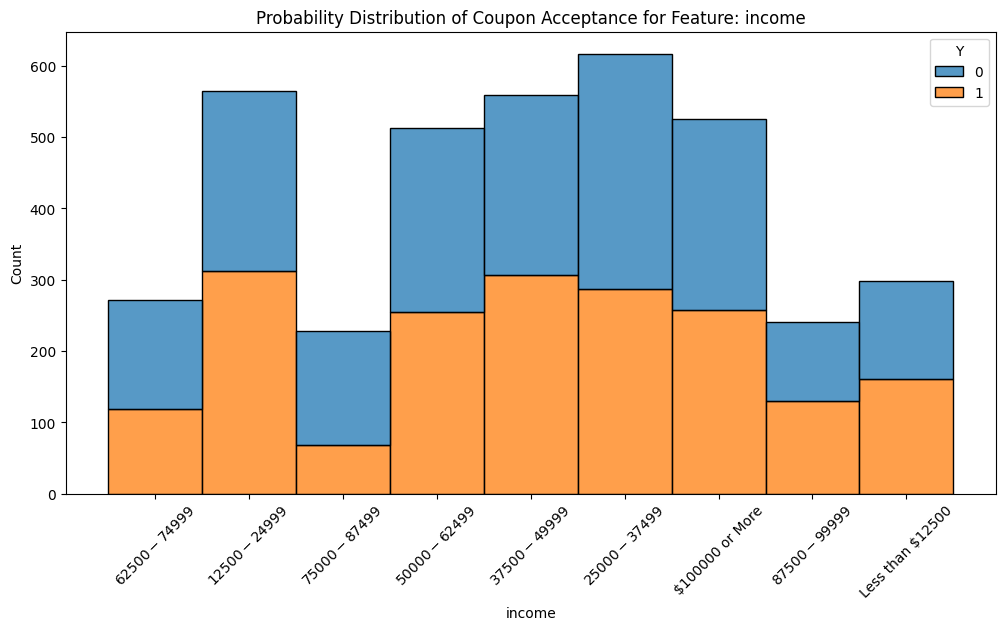

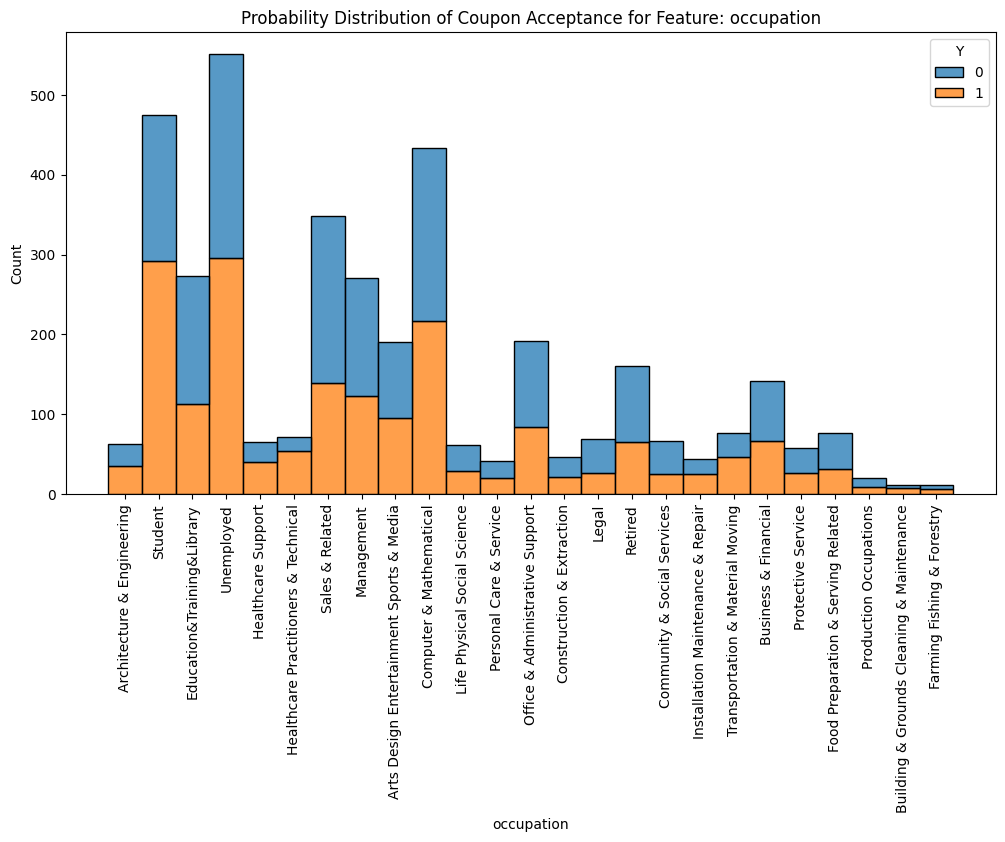

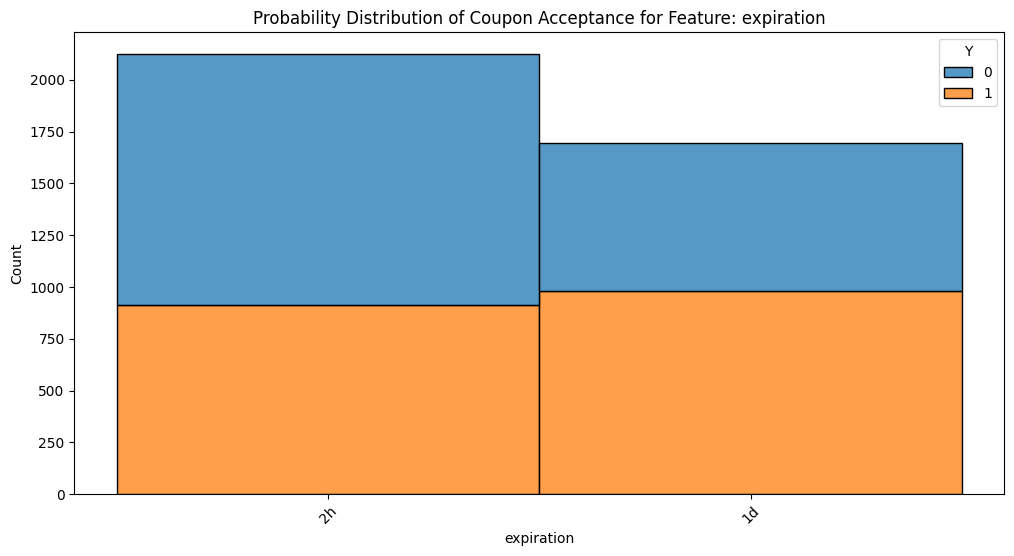

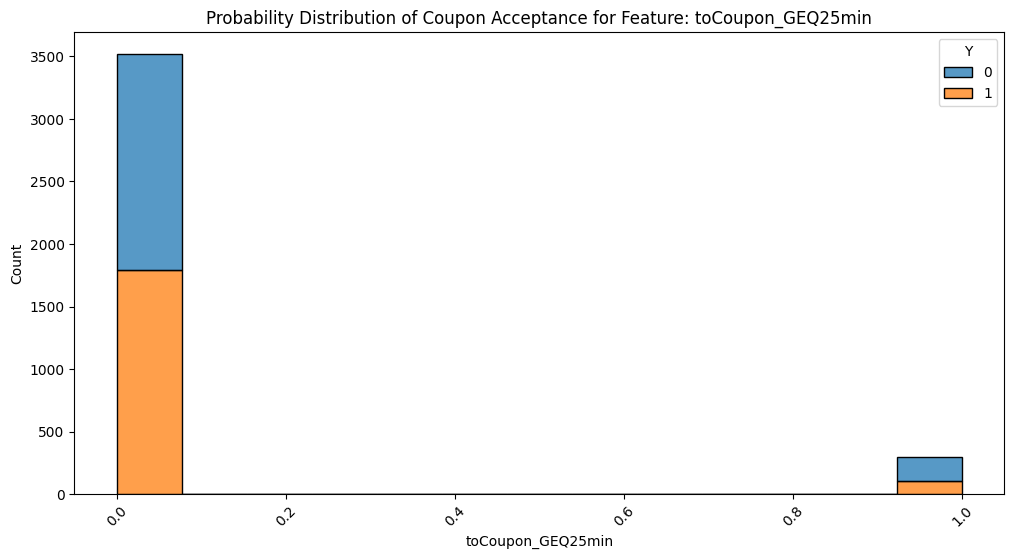

In [27]:
# feature-wise probability analysis

# The feature-wise probability distribution showcases how the likelihood of coupon acceptance changes 
# across different categories within each feature. It helps in understanding which specific values within 
# each feature are associated with higher or lower coupon acceptance rates, thereby aiding in identifying 
# key drivers of behavior.

features = [
    'CoffeeHouse', 'temperature', 'passanger', 'destination', 'income', 'occupation',
    'expiration', 'toCoupon_GEQ25min'
]

for feature in features:
    plt.figure(figsize=(12, 6))
    if feature == 'occupation':
        sns.histplot(data=ch_coupons, x=feature, hue='Y', multiple='stack', kde=False)
        plt.title(f'Probability Distribution of Coupon Acceptance for Feature: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
    else:
        sns.histplot(data=ch_coupons, x=feature, hue='Y', multiple='stack', kde=False)
        plt.title(f'Probability Distribution of Coupon Acceptance for Feature: {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    plt.show()

### Acceptance Rates

In [28]:
# 1. CoffeeHouse_never
coffeehouse_never_acceptance = ch_coupons[ch_coupons['CoffeeHouse'] == 'never'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if coffeehouse_never_acceptance['Y']['Y_count'] == 0:
    coffeehouse_never_acceptance_rate = np.nan
else:
    coffeehouse_never_acceptance_rate = (coffeehouse_never_acceptance['Y']['Y_sum'] / coffeehouse_never_acceptance['Y']['Y_count']) * 100

# 2. Temperature
temperature_acceptance = ch_coupons.groupby('temperature').agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count')).reset_index()
temperature_acceptance['acceptance_rate_percentage'] = (temperature_acceptance['Y_sum'] / temperature_acceptance['Y_count']) * 100

# 3. CoffeeHouse_4~8
coffeehouse_4_8_acceptance = ch_coupons[ch_coupons['CoffeeHouse'] == '4~8'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if coffeehouse_4_8_acceptance['Y']['Y_count'] == 0:
    coffeehouse_4_8_acceptance_rate = np.nan
else:
    coffeehouse_4_8_acceptance_rate = (coffeehouse_4_8_acceptance['Y']['Y_sum'] / coffeehouse_4_8_acceptance['Y']['Y_count']) * 100

# 4. Passanger_Friend(s)
passenger_friend_acceptance = ch_coupons[ch_coupons['passanger'] == 'Friend(s)'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if passenger_friend_acceptance['Y']['Y_count'] == 0:
    passenger_friend_acceptance_rate = np.nan
else:
    passenger_friend_acceptance_rate = (passenger_friend_acceptance['Y']['Y_sum'] / passenger_friend_acceptance['Y']['Y_count']) * 100

# 5. Destination_No Urgent Place
destination_no_urgent_acceptance = ch_coupons[ch_coupons['destination'] == 'No Urgent Place'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if destination_no_urgent_acceptance['Y']['Y_count'] == 0:
    destination_no_urgent_acceptance_rate = np.nan
else:
    destination_no_urgent_acceptance_rate = (destination_no_urgent_acceptance['Y']['Y_sum'] / destination_no_urgent_acceptance['Y']['Y_count']) * 100

# 6. Income_75000 - 87499
income_75000_87499_acceptance = ch_coupons[ch_coupons['income'] == '75000 - 87499'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if income_75000_87499_acceptance['Y']['Y_count'] == 0:
    income_75000_87499_acceptance_rate = np.nan
else:
    income_75000_87499_acceptance_rate = (income_75000_87499_acceptance['Y']['Y_sum'] / income_75000_87499_acceptance['Y']['Y_count']) * 100

# 7. CoffeeHouse_gt8
coffeehouse_gt8_acceptance = ch_coupons[ch_coupons['CoffeeHouse'] == 'gt8'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if coffeehouse_gt8_acceptance['Y']['Y_count'] == 0:
    coffeehouse_gt8_acceptance_rate = np.nan
else:
    coffeehouse_gt8_acceptance_rate = (coffeehouse_gt8_acceptance['Y']['Y_sum'] / coffeehouse_gt8_acceptance['Y']['Y_count']) * 100

# 8. Expiration_2h
expiration_2h_acceptance = ch_coupons[ch_coupons['expiration'] == '2h'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if expiration_2h_acceptance['Y']['Y_count'] == 0:
    expiration_2h_acceptance_rate = np.nan
else:
    expiration_2h_acceptance_rate = (expiration_2h_acceptance['Y']['Y_sum'] / expiration_2h_acceptance['Y']['Y_count']) * 100

# 9. toCoupon_GEQ25min
to_coupon_geq25min_acceptance = ch_coupons[ch_coupons['toCoupon_GEQ25min'] == 1].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if to_coupon_geq25min_acceptance['Y']['Y_count'] == 0:
    to_coupon_geq25min_acceptance_rate = np.nan
else:
    to_coupon_geq25min_acceptance_rate = (to_coupon_geq25min_acceptance['Y']['Y_sum'] / to_coupon_geq25min_acceptance['Y']['Y_count']) * 100

# 10. Occupation_Healthcare Practitioners & Technical
occupation_healthcare_acceptance = ch_coupons[ch_coupons['occupation'] == 'Healthcare Practitioners & Technical'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if occupation_healthcare_acceptance['Y']['Y_count'] == 0:
    occupation_healthcare_acceptance_rate = np.nan
else:
    occupation_healthcare_acceptance_rate = (occupation_healthcare_acceptance['Y']['Y_sum'] / occupation_healthcare_acceptance['Y']['Y_count']) * 100

# 11. Time_6PM
time_6pm_acceptance = ch_coupons[ch_coupons['time'] == '6PM'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if time_6pm_acceptance['Y']['Y_count'] == 0:
    time_6pm_acceptance_rate = np.nan
else:
    time_6pm_acceptance_rate = (time_6pm_acceptance['Y']['Y_sum'] / time_6pm_acceptance['Y']['Y_count']) * 100

# 12. Occupation_Student
occupation_student_acceptance = ch_coupons[ch_coupons['occupation'] == 'Student'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if occupation_student_acceptance['Y']['Y_count'] == 0:
    occupation_student_acceptance_rate = np.nan
else:
    occupation_student_acceptance_rate = (occupation_student_acceptance['Y']['Y_sum'] / occupation_student_acceptance['Y']['Y_count']) * 100

# 13. toCoupon_GEQ15min
to_coupon_geq15min_acceptance = ch_coupons[ch_coupons['toCoupon_GEQ15min'] == 1].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if to_coupon_geq15min_acceptance['Y']['Y_count'] == 0:
    to_coupon_geq15min_acceptance_rate = np.nan
else:
    to_coupon_geq15min_acceptance_rate = (to_coupon_geq15min_acceptance['Y']['Y_sum'] / to_coupon_geq15min_acceptance['Y']['Y_count']) * 100

# 14. Restaurant20To50_gt8
restaurant20to50_gt8_acceptance = ch_coupons[ch_coupons['Restaurant20To50'] == 'gt8'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if restaurant20to50_gt8_acceptance['Y']['Y_count'] == 0:
    restaurant20to50_gt8_acceptance_rate = np.nan
else:
    restaurant20to50_gt8_acceptance_rate = (restaurant20to50_gt8_acceptance['Y']['Y_sum'] / restaurant20to50_gt8_acceptance['Y']['Y_count']) * 100

# 15. Age_below21
age_below21_acceptance = ch_coupons[ch_coupons['age'] == 'below21'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if age_below21_acceptance['Y']['Y_count'] == 0:
    age_below21_acceptance_rate = np.nan
else:
    age_below21_acceptance_rate = (age_below21_acceptance['Y']['Y_sum'] / age_below21_acceptance['Y']['Y_count']) * 100

# 16. Weather_Snowy
weather_snowy_acceptance = ch_coupons[ch_coupons['weather'] == 'Snowy'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if weather_snowy_acceptance['Y']['Y_count'] == 0:
    weather_snowy_acceptance_rate = np.nan
else:
    weather_snowy_acceptance_rate = (weather_snowy_acceptance['Y']['Y_sum'] / weather_snowy_acceptance['Y']['Y_count']) * 100

# 17. Occupation_Sales & Related
occupation_sales_acceptance = ch_coupons[ch_coupons['occupation'] == 'Sales & Related'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if occupation_sales_acceptance['Y']['Y_count'] == 0:
    occupation_sales_acceptance_rate = np.nan
else:
    occupation_sales_acceptance_rate = (occupation_sales_acceptance['Y']['Y_sum'] / occupation_sales_acceptance['Y']['Y_count']) * 100

# 18. Destination_Work
destination_work_acceptance = ch_coupons[ch_coupons['destination'] == 'Work'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if destination_work_acceptance['Y']['Y_count'] == 0:
    destination_work_acceptance_rate = np.nan
else:
    destination_work_acceptance_rate = (destination_work_acceptance['Y']['Y_sum'] / destination_work_acceptance['Y']['Y_count']) * 100

# 19. Time_7AM
time_7am_acceptance = ch_coupons[ch_coupons['time'] == '7AM'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if time_7am_acceptance['Y']['Y_count'] == 0:
    time_7am_acceptance_rate = np.nan
else:
    time_7am_acceptance_rate = (time_7am_acceptance['Y']['Y_sum'] / time_7am_acceptance['Y']['Y_count']) * 100

# 20. CarryAway_less1
carryaway_less1_acceptance = ch_coupons[ch_coupons['CarryAway'] == 'less1'].agg(Y_sum=('Y', 'sum'), Y_count=('Y', 'count'))
if carryaway_less1_acceptance['Y']['Y_count'] == 0:
    carryaway_less1_acceptance_rate = np.nan
else:
    carryaway_less1_acceptance_rate = (carryaway_less1_acceptance['Y']['Y_sum'] / carryaway_less1_acceptance['Y']['Y_count']) * 100

# creating dataframe with Acceptance Rates of Top 10 Features
acceptance_rates = pd.DataFrame({
    'Feature': [
        'CoffeeHouse_never', 'Temperature', 'CoffeeHouse_4~8', 'Passanger_Friend(s)',
        'Destination_No Urgent Place', 'Income_75000 - 87499', 'CoffeeHouse_gt8',
        'Expiration_2h', 'toCoupon_GEQ25min', 'Occupation_Healthcare Practitioners & Technical',
        'Time_6PM', 'Occupation_Student', 'toCoupon_GEQ15min', 'Restaurant20To50_gt8',
        'Age_below21', 'Weather_Snowy', 'Occupation_Sales & Related', 'Destination_Work',
        'Time_7AM', 'CarryAway_less1'
    ],
    'Acceptance Rate (%)': [
        coffeehouse_never_acceptance_rate, temperature_acceptance['acceptance_rate_percentage'].mean(),
        coffeehouse_4_8_acceptance_rate, passenger_friend_acceptance_rate,
        destination_no_urgent_acceptance_rate, income_75000_87499_acceptance_rate,
        coffeehouse_gt8_acceptance_rate, expiration_2h_acceptance_rate,
        to_coupon_geq25min_acceptance_rate, occupation_healthcare_acceptance_rate,
        time_6pm_acceptance_rate, occupation_student_acceptance_rate, to_coupon_geq15min_acceptance_rate,
        restaurant20to50_gt8_acceptance_rate, age_below21_acceptance_rate, weather_snowy_acceptance_rate,
        occupation_sales_acceptance_rate, destination_work_acceptance_rate, time_7am_acceptance_rate,
        carryaway_less1_acceptance_rate
    ]
})

display(acceptance_rates)

,Feature,Acceptance Rate (%)
0,CoffeeHouse_never,17.522321
1,Temperature,47.348713
2,CoffeeHouse_4~8,68.244576
3,Passanger_Friend(s),59.744681
4,Destination_No Urgent Place,57.817828
5,Income_75000 - 87499,NaN
6,CoffeeHouse_gt8,65.789474
7,Expiration_2h,42.910975
8,toCoupon_GEQ25min,34.228188
9,Occupation_Healthcare Practitioners & Technical,76.056338


In [29]:
sorted_acceptance_rates = acceptance_rates.sort_values(by=['Acceptance Rate (%)'], ascending=False)

In [30]:
display(sorted_acceptance_rates)

,Feature,Acceptance Rate (%)
9,Occupation_Healthcare Practitioners & Technical,76.056338
2,CoffeeHouse_4~8,68.244576
14,Age_below21,67.832168
6,CoffeeHouse_gt8,65.789474
13,Restaurant20To50_gt8,63.736264
11,Occupation_Student,61.473684
3,Passanger_Friend(s),59.744681
4,Destination_No Urgent Place,57.817828
1,Temperature,47.348713
12,toCoupon_GEQ15min,45.105954


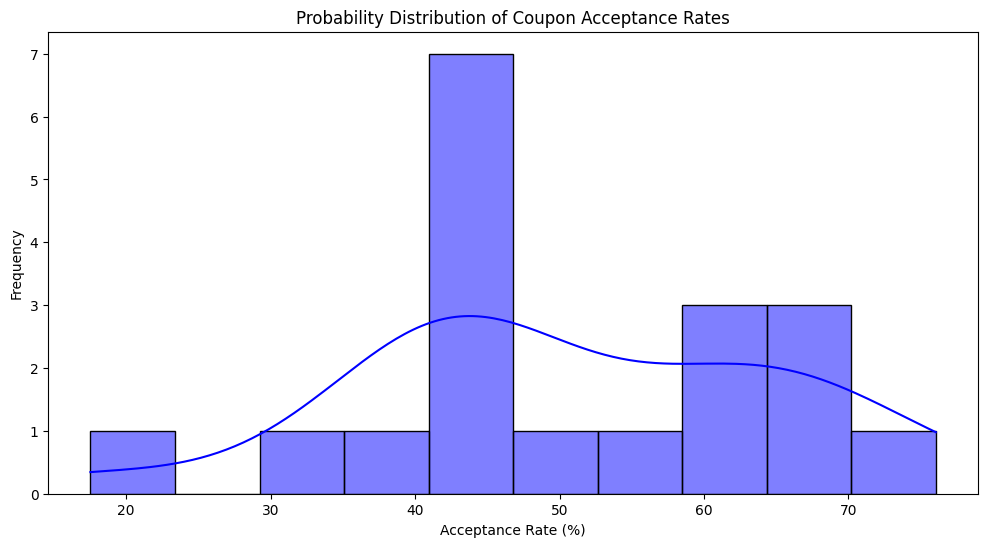

In [31]:
# plotting the probability distributions of acceptance rates
plt.figure(figsize=(12, 6))
sns.histplot(acceptance_rates['Acceptance Rate (%)'], kde=True, color='blue', bins=10)
plt.title('Probability Distribution of Coupon Acceptance Rates')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Frequency')
plt.show()

- The histogram shows that the majority of coupon acceptance rates fall within a central range, with fewer occurrences at very high or very low acceptance rates.
- The KDE curve indicates where the density is highest, which helps in identifying common acceptance rate values. The peak around 40-50% suggests that many features have acceptance rates in this range.

## Findings

The findings section will focus on the characteristics of individuals with a Coffee House coupon done as the Independent Investigation.

**Profile of a Person Who Accepted a Coupon**:

*   **Occupation**: Most likely to be in healthcare-related occupations, such as healthcare practitioners and technical roles. These individuals have a high acceptance rate, possibly due to predictable schedules and regular breaks.
*   **Frequency of Coffee House Visits**: Likely to visit coffee houses moderately often, around 4-8 times per month. This group has shown a high propensity to accept coupons, indicating familiarity and appreciation for coffee house offers.
*   **Social Context**: Often traveling with friends, which suggests that being in a social setting positively influences the decision to accept a coupon. Social motivation could lead to increased interest in deals.
*   **Age**: Younger individuals, particularly those below 21 years old, are more likely to accept coupons. This could be linked to a greater interest in deals and social activities.
*   **Income**: Individuals with moderate incomes (e.g., $75,000 - $87,499) tend to be more receptive, possibly seeking additional value from coupons.
*   **Destination**: More likely to accept a coupon when headed to a non-urgent destination, implying they are in a more relaxed frame of mind and open to trying new things.
*   **Other Factors**: Acceptance is influenced by moderate weather (not too cold or hot), and coupons with a short expiration (2 hours) also see higher acceptance, suggesting immediacy plays a role.

**Profile of a Person Who Did Not Accept a Coupon**:

*   **Occupation**: Likely to be in occupations with less flexibility, such as sales-related roles. These individuals may not have the flexibility to take breaks or use coupons when offered.
*   **Frequency of Coffee House Visits**: People who either rarely visit coffee houses or visit too frequently (more than 8 times) tend to reject coupons. This indicates that either a lack of interest or oversaturation affects their decision.
*   **Social Context**: Often traveling alone or with passengers other than friends, indicating a lack of social influence, which could reduce interest in coupon use.
*   **Age**: Older individuals or those not in the below-21 group tend to have lower acceptance rates, possibly due to different spending habits or preferences.
*   **Income**: Individuals with higher or very low incomes might not find coupons appealing—either because they do not see the savings as significant or because they are not interested in spending on such offers.
*   **Destination**: People headed to work or urgent destinations are less likely to accept coupons, suggesting that being preoccupied or in a hurry reduces the likelihood of engaging with promotions.
*   **Other Factors**: Acceptance rates drop in extreme weather conditions (e.g., very cold or hot), and for coupons with longer expiration times, as the perceived urgency and value diminish.

## Next Steps and Recommendations

While this is geared towards the Coffee House coupon segment, the concepts and steps taken to arrive at these distinctions can be applied to all the other coupon types.

1. **Targeted Marketing Campaigns**: Focus on specific groups that are more likely to accept coupons, such as healthcare professionals, younger individuals, and those traveling with friends. Use targeted marketing to increase coupon uptake within these high-acceptance segments.
2. **Optimize Coupon Timing and Expiration**: Offer coupons at times when customers are headed to non-urgent destinations or during moderate weather conditions. Shorter expiration times (e.g., 2 hours) appear to increase the likelihood of coupon acceptance, suggesting that a sense of immediacy can drive engagement.
3. **Leverage Social Context**: Create promotions that encourage people to use coupons with friends or in social situations. This could include group discounts or incentives for sharing deals, as social motivation appears to positively influence coupon acceptance.
4. **Flexible Occupations and Scheduling**: Since individuals with more flexible occupations are more likely to accept coupons, focus promotional efforts on people with predictable schedules. This may involve targeting work locations where employees have more regular breaks.
5. **Address Income Groups with Tailored Offers**: Tailor coupons based on income level to appeal to the specific needs of different groups. For example, moderate-income individuals may respond better to value-oriented offers, while higher-income groups might appreciate premium deals or exclusive experiences.
6. **Adjust Messaging for Urgent Destinations**: People headed to work or urgent destinations are less likely to accept coupons. Consider adjusting the messaging or timing of offers to avoid these situations, or offer incentives that are relevant to their immediate needs (e.g., quick grab-and-go items).
7. **Test and Iterate**: Use A/B testing to evaluate the effectiveness of these targeted strategies. Test different combinations of the identified factors—such as social context, timing, and occupation—and refine the campaigns based on observed acceptance rates.

These recommendations can help maximize the effectiveness of coupon campaigns by focusing on the conditions and customer profiles most likely to lead to acceptance, ultimately improving return on investment and customer engagement.